<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/4lstm_non_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

!pip install --upgrade scikit-learn

import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load korpus

In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [3]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

cari paling panjang dalam korpus

In [4]:
paling_panjang=0
i=0
ke=0
for x in df.dokumen:
  if paling_panjang<len(x):
    paling_panjang=len(x)
    kata=x
    ke=i
  i+=1
print(paling_panjang)
print(kata)
print(ke)

178
['a', 'few', 'days', 'back', 'i', 'was', 'waiting', 'for', 'the', 'bus', 'at', 'the', 'bus', 'stop', 'before', 'getting', 'into', 'the', 'bus', 'i', 'had', 'prepared', 'the', 'exact', 'amount', 'of', 'coins', 'to', 'pay', 'for', 'the', 'bus', 'fair', 'and', 'when', 'i', 'got', 'into', 'the', 'bus', 'i', 'put', 'these', 'coins', 'into', 'the', 'box', 'meant', 'to', 'collect', 'the', 'bus', 'fair', 'i', 'thought', 'that', 'i', 'had', 'paid', 'and', 'wanted', 'to', 'get', 'inside', 'however', 'the', 'bus', 'driver', 'called', 'me', 'and', 'asked', 'me', 'in', 'an', 'impolite', 'way', 'if', 'the', 'coins', 'were', 'stuck', 'at', 'the', 'opening', 'of', 'the', 'box', 'he', 'had', 'not', 'seen', 'me', 'paying', 'and', 'there', 'wasnt', 'a', 'stack', 'of', 'coins', 'in', 'the', 'box', 'i', 'could', 'not', 'understand', 'this', 'and', 'the', 'driver', 'kept', 'questioning', 'me', 'he', 'made', 'me', 'feel', 'angry', 'and', 'at', 'last', 'i', 'inserted', 'a', 'dollar', 'coin', 'in', 'the', 

In [5]:
df.dokumen.iloc[7443]

['a',
 'few',
 'days',
 'back',
 'i',
 'was',
 'waiting',
 'for',
 'the',
 'bus',
 'at',
 'the',
 'bus',
 'stop',
 'before',
 'getting',
 'into',
 'the',
 'bus',
 'i',
 'had',
 'prepared',
 'the',
 'exact',
 'amount',
 'of',
 'coins',
 'to',
 'pay',
 'for',
 'the',
 'bus',
 'fair',
 'and',
 'when',
 'i',
 'got',
 'into',
 'the',
 'bus',
 'i',
 'put',
 'these',
 'coins',
 'into',
 'the',
 'box',
 'meant',
 'to',
 'collect',
 'the',
 'bus',
 'fair',
 'i',
 'thought',
 'that',
 'i',
 'had',
 'paid',
 'and',
 'wanted',
 'to',
 'get',
 'inside',
 'however',
 'the',
 'bus',
 'driver',
 'called',
 'me',
 'and',
 'asked',
 'me',
 'in',
 'an',
 'impolite',
 'way',
 'if',
 'the',
 'coins',
 'were',
 'stuck',
 'at',
 'the',
 'opening',
 'of',
 'the',
 'box',
 'he',
 'had',
 'not',
 'seen',
 'me',
 'paying',
 'and',
 'there',
 'wasnt',
 'a',
 'stack',
 'of',
 'coins',
 'in',
 'the',
 'box',
 'i',
 'could',
 'not',
 'understand',
 'this',
 'and',
 'the',
 'driver',
 'kept',
 'questioning',
 'me',
 

cek

In [6]:
df.head()

,emosi,dokumen
0,joy,"[on, days, when, i, feel, close, to, my, partn..."
1,fear,"[every, time, i, imagine, that, someone, i, lo..."
2,anger,"[when, i, had, been, obviously, unjustly, trea..."
3,sadness,"[when, i, think, about, the, short, time, that..."
4,disgust,"[at, a, gathering, i, found, myself, involunta..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emosi    7516 non-null   object
 1   dokumen  7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


bagi kolom klasifikasi

In [8]:
category = pd.get_dummies(df.emosi)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='emosi')
df_new

,dokumen,anger,disgust,fear,guilt,joy,sadness,shame
0,"[on, days, when, i, feel, close, to, my, partn...",0,0,0,0,1,0,0
1,"[every, time, i, imagine, that, someone, i, lo...",0,0,1,0,0,0,0
2,"[when, i, had, been, obviously, unjustly, trea...",1,0,0,0,0,0,0
3,"[when, i, think, about, the, short, time, that...",0,0,0,0,0,1,0
4,"[at, a, gathering, i, found, myself, involunta...",0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7511,"[two, years, back, someone, invited, me, to, b...",0,0,0,0,0,0,1
7512,"[i, had, taken, the, responsibility, to, do, s...",0,0,0,0,0,0,1
7513,"[i, was, at, home, and, i, heard, a, loud, sou...",0,0,1,0,0,0,0
7514,"[i, did, not, do, the, homework, that, the, te...",0,0,0,1,0,0,0


cek null

In [9]:
df_new.isnull().sum()

dokumen    0
anger      0
disgust    0
fear       0
guilt      0
joy        0
sadness    0
shame      0
dtype: int64

padding

In [10]:
max_features = paling_panjang+2

In [11]:
max_features

180

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.dokumen)

In [13]:
np.shape(df.dokumen.iloc[1])

(17,)

In [14]:
df.dokumen.iloc[1]

['every',
 'time',
 'i',
 'imagine',
 'that',
 'someone',
 'i',
 'love',
 'or',
 'i',
 'could',
 'contact',
 'a',
 'serious',
 'illness',
 'even',
 'death']

In [15]:
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# seq = tokenizer.texts_to_sequences(df.dokumen)
seq_test = tokenizer.texts_to_sequences(df.dokumen)

X_pad = sequence.pad_sequences(seq_test, padding='pre', maxlen=max_features)
# X_test_pad = pad_sequences(seq_test, padding='post',)

# train_padded = pad_sequences(train_sequences, maxlen=max_len, truncating="post", padding="post")

In [16]:
np.shape(X_pad)
# X_pad

(7516, 180)

In [17]:
jumlah_kata=len(tokenizer.word_index)

In [18]:
word_index=tokenizer.word_index

In [19]:
word_index["as"]

29

In [20]:
X_pad[7443]

array([   0,    0,    3,  153,  180,   79,    1,    7,  389,   15,    2,
        184,   18,    2,  184,  391,  120,  196,  118,    2,  184,    1,
         11,  447,    2, 2400, 1215,    9, 1571,    4,  513,   15,    2,
        184, 1334,    6,    8,    1,   46,  118,    2,  184,    1,  238,
        534, 1571,  118,    2, 1566,  838,    4, 1623,    2,  184, 1334,
          1,   91,   13,    1,   11,  945,    6,   96,    4,  107, 1048,
        251,    2,  184,  418,  224,   12,    6,  103,   12,   10,   24,
       1754,  130,  179,    2, 1571,   36, 1506,   18,    2, 3169,    9,
          2, 1566,   20,   11,   14,  277,   12, 1180,    6,   63,  421,
          3, 9128,    9, 1571,   10,    2, 1566,    1,   69,   14,  424,
         31,    6,    2,  418,  409, 9129,   12,   20,   74,   12,  105,
         90,    6,   18,  143,    1, 9130,    3, 3318, 1890,   10,    2,
       1566,  139,    4,  107,  101,   32,   40,  140,    1,   86,   13,
          1,   11,  726,    3,  153, 1571,   10,   

In [21]:
X = X_pad
y = df_new[['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']].values
print(np.shape(X))
print(np.shape(y))

(7516, 180)
(7516, 7)


load model word embedding

In [22]:
pakai_model=1

In [23]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 10.8 MB/s 


In [24]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model word embedding

In [25]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1048781, 100)


In [26]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

[-0.52128315 -0.79088104 -0.15055113 -0.31512925  0.14744855  0.07264802
 -0.2913117  -0.03864964  0.33448783 -0.38321584 -0.12776025  0.16693452
 -0.036732    0.736858   -0.22089869  0.30637467 -0.34601235  0.02692696
  0.42270225  0.14580129  0.34575212  0.34704852 -0.38253692  0.5232027
 -0.5892915   0.24635637  0.29069707 -0.15231234  0.23371382 -0.02552057
  0.5403861  -0.32759118  0.22016506  0.24308042 -0.33714053 -0.25229603
  0.15955421 -0.2699975  -0.07551649 -0.00739359  0.18757325  0.4116258
 -0.03943484 -0.29445037  0.19409174 -0.49860442 -0.44503042 -0.36773324
  0.56713533  0.20831311 -0.00298472  0.267926    0.4929098   0.22879563
 -0.05912206  0.17915553  0.15342142 -0.18735889 -0.0977503   0.05288584
 -0.0898988  -0.25296098  0.22592372 -0.01546502 -0.09625263 -0.51878595
  0.1541172   0.6803038   0.10103451 -0.02387618  0.5089661  -0.36266452
  0.5969234   0.16905098  0.07498565  0.06403165  0.36039498  0.28974342
  0.02168966  0.17164262 -0.508625   -0.11300381 -0.2

buat dictionary

In [27]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

In [28]:
word_index["germs"]

9204

In [29]:
for word, i in word_index.items():
  embedding_matrix[i] = model.wv[word]

In [30]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.30040976, -0.64987355, -0.24826317, ..., -0.01114162,
         0.33765933, -0.29789779],
       [-0.14434472, -0.74197435,  0.17227097, ..., -0.21401656,
         0.26530993,  0.0227598 ],
       ...,
       [-0.05346367, -0.19583617,  0.02418035, ..., -0.08031848,
         0.03016862, -0.12204677],
       [-0.10206933, -0.95014596,  0.03156902, ..., -0.39531717,
         0.36152655, -0.16352107],
       [-0.49336624, -1.29626536,  0.36917949, ..., -0.29623368,
         0.31606525, -0.29229671]])

In [31]:
embedding_matrix[7443]

array([-0.65628409, -0.26406175, -0.0542377 ,  0.09378553,  0.19423608,
        0.0703275 ,  0.11408962,  0.10963756,  0.07403959, -1.44088972,
        0.27981892, -0.04768158, -0.06128363,  0.40507135, -0.03824425,
        0.71036762, -0.31370765, -0.19397451,  0.12980455,  0.38473517,
        0.09896361,  0.34347004, -0.36360282,  0.57896698, -0.42181653,
        0.15653978, -0.34950194,  0.25535324,  0.14426064,  0.57930565,
        0.10374044,  0.12194508,  0.88608664,  0.4315874 , -0.08928371,
       -0.15223441, -0.74243546, -0.18162596, -0.05018938,  0.07299133,
       -0.09815373, -0.40111592, -0.38167989, -0.16913432,  0.33609581,
       -0.10462926, -0.19438459,  0.06948319,  0.44773561,  0.19677162,
        0.74682468,  0.22669141,  0.28657681,  0.0385992 , -0.05412858,
        0.28946379,  0.03843797, -0.25655964, -0.68379039,  0.39793169,
        0.03824979, -0.52767956,  0.40281668,  0.41467869, -0.14321037,
       -0.35630605, -0.57767624,  0.40613645,  0.49984947, -0.38

In [32]:
embedding_matrix.shape

(9205, 100)

average base ektraksi fitur (jika makai)

In [32]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

1 fold

train test split

In [33]:
print(np.shape(X))
print(np.shape(y))

(7516, 180)
(7516, 7)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, df.emosi, random_state=0, test_size=0.1)

In [35]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(6764, 180)
(752, 180)
(6764, 7)
(752, 7)


load package

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
import tensorflow as tf
from keras.initializers import Constant

buat arsitektur lstm

In [63]:
# Creating model
model = Sequential()

# model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False,))
# model.add(LSTM(100, dropout=0.1))
# model.add(Dense(7, activation="softmax"))

model.add(Embedding(num_words, 100, input_length=max_features))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.1)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(800, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 180, 100)          920500    
                                                                 
 dropout_6 (Dropout)         (None, 180, 100)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                10050     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                      

In [48]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 3, 
                                        restore_best_weights = True)

In [64]:
# history = model.fit(X_train, y_train, epochs=30, 
#                     validation_data=(X_test, y_test), 
#                     callbacks=[earlystopping], verbose=1)

history = model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
212/212 [==============================] - 22s 83ms/step - loss: 1.9454 - accuracy: 0.1440
Epoch 2/50
212/212 [==============================] - 17s 79ms/step - loss: 1.9399 - accuracy: 0.1703
Epoch 3/50
212/212 [==============================] - 16s 76ms/step - loss: 1.9278 - accuracy: 0.1913
Epoch 4/50
212/212 [==============================] - 16s 75ms/step - loss: 1.8915 - accuracy: 0.2324
Epoch 5/50
212/212 [==============================] - 16s 75ms/step - loss: 1.7685 - accuracy: 0.2781
Epoch 6/50
212/212 [==============================] - 16s 74ms/step - loss: 1.6553 - accuracy: 0.3270
Epoch 7/50
212/212 [==============================] - 16s 75ms/step - loss: 1.5649 - accuracy: 0.3699
Epoch 8/50
212/212 [==============================] - 16s 75ms/step - loss: 1.4696 - accuracy: 0.3907
Epoch 9/50
212/212 [==============================] - 16s 74ms/step - loss: 1.3964 - accuracy: 0.4277
Epoch 10/50
212/212 [==============================] - 16s 74ms/step - loss: 1.305

In [65]:
predict_x=model.predict(X_test)
y_temp=np.argmax(predict_x,axis=1)

y_pred_num=[]
y_pred_num.extend(y_temp)

In [66]:
unique, counts = np.unique(y_temp, return_counts=True)
dict(zip(unique, counts))

{0: 110, 1: 115, 2: 104, 3: 104, 4: 106, 5: 100, 6: 113}

In [67]:
np.sum(counts)

752

In [68]:
y_pred=[]

for num in y_pred_num:
  if num == 0:
    y_pred.append('anger')
  elif num == 1:
    y_pred.append('disgust')
  elif num == 2:
    y_pred.append('fear')
  elif num == 3:
    y_pred.append('guilt')
  elif num == 4:
    y_pred.append('joy')
  elif num == 5:
    y_pred.append('sadness')
  elif num == 6:
    y_pred.append('shame')

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

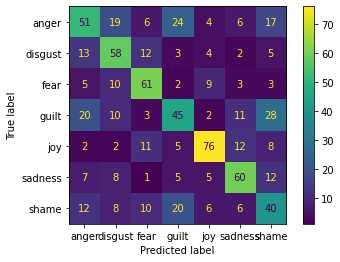

0.5199468085106383
(0.5225969131306453, 0.527593194425102, 0.523323522315002, None)


In [70]:
ConfusionMatrixDisplay.from_predictions(y2_test, y_pred)
plt.show()
print(accuracy_score(y2_test, y_pred))
print(precision_recall_fscore_support(y2_test, y_pred, average='macro'))

10 fold

In [ ]:
print(np.shape(X))
print(np.shape(y))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

y_pred_num=[]

for train_index, test_index in kf.split(X,y):

  model = Sequential()

  model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False,))
  model.add(Dropout(0.3))
  model.add(Bidirectional(LSTM(100, dropout=0.1)))
  model.add(Dropout(0.3))
  model.add(Dense(82, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(7, activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

  history = model.fit(X[train_index], y[train_index], epochs=20,verbose=1)

  predict_x=model.predict(X[test_index])
  y_temp=np.argmax(predict_x,axis=1)

  y_pred_num.extend(y_temp)

In [ ]:
np.shape(y_pred_num)

(7516,)

In [ ]:
y_pred=[]

for num in y_pred_num:
  if num == 0:
    y_pred.append('anger')
  elif num == 1:
    y_pred.append('disgust')
  elif num == 2:
    y_pred.append('fear')
  elif num == 3:
    y_pred.append('guilt')
  elif num == 4:
    y_pred.append('joy')
  elif num == 5:
    y_pred.append('sadness')
  elif num == 6:
    y_pred.append('shame')

In [ ]:
np.shape(y)

(7516, 7)

In [ ]:
np.shape(y_pred)

(7516,)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

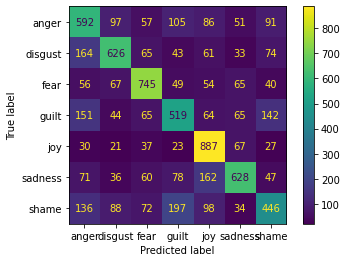

0.591138903672166
(0.5899739183213537, 0.5902391489142544, 0.5868668315357489, None)


In [ ]:
ConfusionMatrixDisplay.from_predictions(df.emosi, y_pred)
plt.show()
print(accuracy_score(df.emosi, y_pred))
print(precision_recall_fscore_support(df.emosi, y_pred, average='macro'))

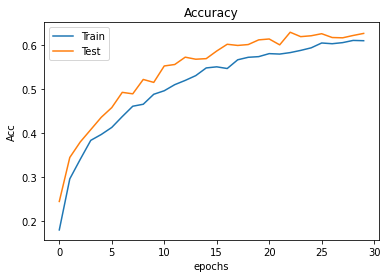

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

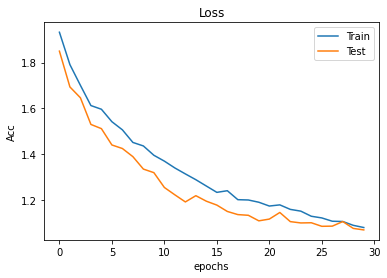

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 1s 11ms/step - loss: 1.0708 - accuracy: 0.6257


[1.0707762241363525, 0.6256648898124695]